# Dall’istruzione al benessere: un’analisi dell’impatto educativo sui principali indicatori di sviluppo

## Obiettivo

### Valutare la relazione tra partecipazione scolastica, completamento dell’istruzione e spesa educativa, e combinare questi indicatori con alcuni parametri di sviluppo e benessere per individuare quali strategie educative siano più efficaci nel migliorare lo sviluppo umano e socio-economico in alcuni Paesi significativi.

A tale scopo mi servirò principalmente del dataset “EdStats” della World Bank, che raccoglie le principali statistiche globali sull’istruzione.

Per ampliare la prospettiva e valutare l’impatto dell’istruzione su dimensioni più ampie dello sviluppo umano, l’analisi integra inoltre tre dataset aggiuntivi della World Bank: il tasso di mortalità infantile, l’aspettativa di vita alla nascita e il GDP per capita. Questi indicatori permettono di osservare come i progressi educativi si colleghino a miglioramenti in ambito sanitario, economico e sociale.

I Paesi inclusi nell’analisi sono stati selezionati in base alla rilevanza e alla diversificazione geografica e socio-politica a livello mondiale, privilegiando quei contesti che offrono un quadro temporale sufficientemente ampio da consentire confronti significativi e affidabili, in termini di disponibilità dei dati.

Il mio intento, rispetto alla consegna, è stato dunque quello di costruire un’analisi che non si limitasse a mostrare valori puntuali,
ma che cercasse attivamente connessioni e pattern utili a riflettere sull’impatto dell’istruzione sul benessere delle società. 
Le visualizzazioni prodotte e le correlazioni calcolate mirano a fornire una prima interpretazione dei dati, 
utile come base per elaborare eventuali raccomandazioni, approfondimenti futuri o politiche mirate.

In [1]:
# Importo le librerie necessarie

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
# Carico il dataset EdStats di World Bank

df_ed = pd.read_excel('/Users/valerioquaranta/Documents/Data Manipulation and Visualization/Progetto/Prog_corr/EdStats_v01.xlsx')

In [3]:
df_ed.head()

,Country name,Country code,Indicator name,Indicator code,1970,1971,1972,1973,1974,1975,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,"Adjusted attendance rate, one year before the ...",UIS.NARA.AGM1.Q2.F.LPIA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27447,NaN,NaN
1,Afghanistan,AFG,"Adjusted attendance rate, one year before the ...",UIS.NARA.AGM1.Q2.M.LPIA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47413,NaN,NaN
2,Afghanistan,AFG,"Adjusted net attendance rate, one year before ...",UIS.NARA.AGM1.GPIA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85575,NaN,NaN
3,Afghanistan,AFG,"Adjusted net attendance rate, one year before ...",UIS.NARA.AGM1.LPIA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.59410,NaN,NaN
4,Afghanistan,AFG,"Adjusted net attendance rate, one year before ...",UIS.NARA.AGM1.WPIA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.32339,NaN,NaN


In [4]:
# Visualizzo le info del DataFrame

df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367782 entries, 0 to 367781
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country name    363060 non-null  object 
 1   Country code    367782 non-null  object 
 2   Indicator name  363060 non-null  object 
 3   Indicator code  367782 non-null  object 
 4   1970            16054 non-null   float64
 5   1971            24520 non-null   float64
 6   1972            24206 non-null   float64
 7   1973            24000 non-null   float64
 8   1974            24012 non-null   float64
 9   1975            24010 non-null   float64
 10  1976            24851 non-null   float64
 11  1977            24734 non-null   float64
 12  1978            24611 non-null   float64
 13  1979            24597 non-null   float64
 14  1980            25291 non-null   float64
 15  1981            25716 non-null   float64
 16  1982            25262 non-null   float64
 17  1983      

In [5]:
# Visualizzo i valori della colonna 'Indicator name'

df_ed['Indicator name'].unique()

array(['Adjusted attendance rate, one year before the official primary entry age, second quintile, female, adjusted location parity index (LPIA)',
       'Adjusted attendance rate, one year before the official primary entry age, second quintile, male, adjusted location parity index (LPIA)',
       'Adjusted net attendance rate, one year before the official primary entry age, adjusted gender parity index (GPIA)',
       ..., 'Fraction of Children Under 5 Not Stunted, Female',
       'Fraction of Children Under 5 Not Stunted, Male', nan],
      dtype=object)

In [6]:
# Cerco gli indicatori che abbiano nel nome le parole 'enrolment' e 'primary' 

en_indicators = df_ed[df_ed['Indicator name'].str.contains('enrolment', case=False) & df_ed['Indicator name'].str.contains('primary', case=False)]
en_indicators['Indicator name'].unique()

array(['Enrolment in pre-primary education, both sexes (number)',
       'Enrolment in pre-primary education, female (number)',
       'Enrolment in pre-primary education, male (number)',
       'Enrolment in primary education, both sexes (number)',
       'Enrolment in primary education, female (number)',
       'Enrolment in primary education, male (number)',
       'Gross enrolment ratio, primary and lower secondary, both sexes (%)',
       'Gross enrolment ratio, primary and lower secondary, female (%)',
       'Gross enrolment ratio, primary and lower secondary, male (%)',
       'Gross enrolment ratio, primary and secondary, both sexes (%)',
       'Gross enrolment ratio, primary and secondary, female (%)',
       'Gross enrolment ratio, primary and secondary, male (%)',
       'Gross enrolment ratio, primary to tertiary, both sexes (%)',
       'Gross enrolment ratio, primary to tertiary, female (%)',
       'Gross enrolment ratio, primary to tertiary, male (%)',
       'Gross e

In [7]:
# Cerco gli indicatori che abbiano nel nome le paarole 'completion' e 'secondary' 

com_indicators = df_ed[df_ed['Indicator name'].str.contains('completion', case=False) & df_ed['Indicator name'].str.contains('secondary', case=False)]
com_indicators['Indicator name'].unique()

array(['Completion rate, lower secondary education, adjusted gender parity index (GPIA)',
       'Completion rate, lower secondary education, adjusted location parity index (LPIA)',
       'Completion rate, lower secondary education, adjusted wealth parity index (WPIA)',
       'Completion rate, lower secondary education, both sexes (%)',
       'Completion rate, lower secondary education, female (%)',
       'Completion rate, lower secondary education, female, adjusted location parity index (LPIA)',
       'Completion rate, lower secondary education, female, adjusted wealth parity index (WPIA)',
       'Completion rate, lower secondary education, fourth quintile, adjusted gender parity index (GPIA)',
       'Completion rate, lower secondary education, fourth quintile, adjusted location parity index (LPIA)',
       'Completion rate, lower secondary education, fourth quintile, both sexes (%)',
       'Completion rate, lower secondary education, fourth quintile, female (%)',
       'Comp

In [8]:
# Cerco gli indicatori che abbiano nel nome la paorla 'GDP' 

exp_indicators = df_ed[df_ed['Indicator name'].str.contains('GDP', case=False, na=False)]
exp_indicators['Indicator name'].unique()

array(['Government expenditure on education as a percentage of GDP (%)',
       'Government expenditure on lower secondary education as a percentage of GDP (%)',
       'Government expenditure on post-secondary non-tertiary education as a percentage of GDP (%)',
       'Government expenditure on pre-primary education as a percentage of GDP (%)',
       'Government expenditure on primary education as a percentage of GDP (%)',
       'Government expenditure on secondary and post-secondary non-tertiary vocational education as a percentage of GDP (%)',
       'Government expenditure on secondary education as a percentage of GDP (%)',
       'Government expenditure on tertiary education as a percentage of GDP (%)',
       'Government expenditure on upper secondary education as a percentage of GDP (%)',
       'Initial government funding per lower secondary student as a percentage of GDP per capita',
       'Initial government funding per pre-primary student as a percentage of GDP per capita

In [9]:
# Pulisco i nomi delle colonne

df_ed.columns = df_ed.columns.str.strip()

In [10]:
# Creo una lista di paesi da analizare e controllo se sono presenti nel dataframe

countries_list = ['Italy', 'Germany', 'United States', 'Canada', 'China', 'India', 'Brazil', 'South Africa', 'Kenya', 'Australia']
available_countries = df_ed['Country name'].unique()
missing_countries = [country for country in countries_list if country not in available_countries]
if missing_countries:
    print(f"I seguenti Paesi non sono presenti nel dataframe: {missing_countries}")
else:
    print("Tutti i Paesi sono presenti nel dataframe.")


Tutti i Paesi sono presenti nel dataframe.


In [11]:
# Filtro il dataframe per includere una lista di Paesi significativi 

df_ed = df_ed[df_ed['Country name'].isin(countries_list)]
df_ed['Country name'].unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'India',
       'Italy', 'Kenya', 'South Africa', 'United States'], dtype=object)

In [12]:
# Creo una lista di indicatori da analizzare e controllo se sono presenti nel dataframe (Gli indicatori sono stati scelti dopo il filtraggio in base alla loro rilevanza per l'analisi dell'educazione)

indicators_list = ['Total net enrolment rate, primary, both sexes (%)', 
                   'Completion rate, upper secondary education, both sexes (%)',
                   'Government expenditure on education as a percentage of GDP (%)'
]

available_indicators = df_ed['Indicator name'].unique()
missing_indicators = [indicator for indicator in indicators_list if indicator not in available_indicators]
if missing_indicators:
    print(f"I seguenti indicatori non sono presenti nel dataframe: {missing_indicators}")
else: 
    print("Tutti gli indicatori sono presenti nel dataframe.")

Tutti gli indicatori sono presenti nel dataframe.


In [13]:
# Filtro il dataframe per includere solo gli indicatori selezionati

df_ed = df_ed[df_ed['Indicator name'].isin(indicators_list)]
df_ed['Indicator name'].unique()

array(['Completion rate, upper secondary education, both sexes (%)',
       'Government expenditure on education as a percentage of GDP (%)',
       'Total net enrolment rate, primary, both sexes (%)'], dtype=object)

In [14]:
# Resetto l'indce e controllo il dataframe

df_ed = df_ed.reset_index(drop=True)
df_ed.head()

,Country name,Country code,Indicator name,Indicator code,1970,1971,1972,1973,1974,1975,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Australia,AUS,"Completion rate, upper secondary education, bo...",UIS.CR.3,NaN,NaN,NaN,NaN,NaN,NaN,...,85.790001,87.300003,86.410004,90.309998,87.339996,87.699997,88.010002,88.250000,88.489998,NaN
1,Australia,AUS,Government expenditure on education as a perce...,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.315520,5.286890,5.138230,5.124310,5.134290,5.608450,5.730000,5.206777,NaN,NaN
2,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,NaN,97.42836,NaN,96.061241,95.968842,98.543327,...,99.971870,99.992218,99.942207,99.808350,99.785957,99.419151,99.632187,99.703590,NaN,NaN
3,Brazil,BRA,"Completion rate, upper secondary education, bo...",UIS.CR.3,NaN,NaN,NaN,NaN,NaN,NaN,...,63.310001,63.950001,64.250000,66.279999,69.260002,72.959999,73.370003,73.529999,NaN,NaN
4,Brazil,BRA,Government expenditure on education as a perce...,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.241060,6.314040,6.320480,6.088510,5.963470,5.771500,NaN,NaN,NaN,NaN


In [15]:
# Converto la tabella da formato long a wide per facilitare l'analisi

df_ed = df_ed.melt(
    id_vars=['Country name', 'Country code', 'Indicator name', 'Indicator code'],
    var_name='Year', 
    value_name='Value'
)

In [16]:
# Converto la colonna 'Year' in numerico

df_ed['Year'] = pd.to_numeric(df_ed['Year'], errors='coerce')

In [17]:
df_ed.head()

,Country name,Country code,Indicator name,Indicator code,Year,Value
0,Australia,AUS,"Completion rate, upper secondary education, bo...",UIS.CR.3,1970,NaN
1,Australia,AUS,Government expenditure on education as a perce...,SE.XPD.TOTL.GD.ZS,1970,NaN
2,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1970,NaN
3,Brazil,BRA,"Completion rate, upper secondary education, bo...",UIS.CR.3,1970,NaN
4,Brazil,BRA,Government expenditure on education as a perce...,SE.XPD.TOTL.GD.ZS,1970,NaN


In [18]:
# Ordino il DataFrame per Paese, Indicatore e Anno e resetto l'indice

df_ed = df_ed.sort_values(by=['Country name', 'Indicator name', 'Year']).reset_index(drop=True)
df_ed.head()

,Country name,Country code,Indicator name,Indicator code,Year,Value
0,Australia,AUS,"Completion rate, upper secondary education, bo...",UIS.CR.3,1970,NaN
1,Australia,AUS,"Completion rate, upper secondary education, bo...",UIS.CR.3,1971,NaN
2,Australia,AUS,"Completion rate, upper secondary education, bo...",UIS.CR.3,1972,NaN
3,Australia,AUS,"Completion rate, upper secondary education, bo...",UIS.CR.3,1973,NaN
4,Australia,AUS,"Completion rate, upper secondary education, bo...",UIS.CR.3,1974,NaN


In [19]:
# Elimino la colonna 'Indicator code' in quanto non necessaria

df_ed = df_ed.drop(columns=['Indicator code'])

In [20]:
df_ed.isna().sum()

Country name        0
Country code        0
Indicator name      0
Year                0
Value             865
dtype: int64

In [21]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country name    1650 non-null   object 
 1   Country code    1650 non-null   object 
 2   Indicator name  1650 non-null   object 
 3   Year            1650 non-null   int64  
 4   Value           785 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 64.6+ KB


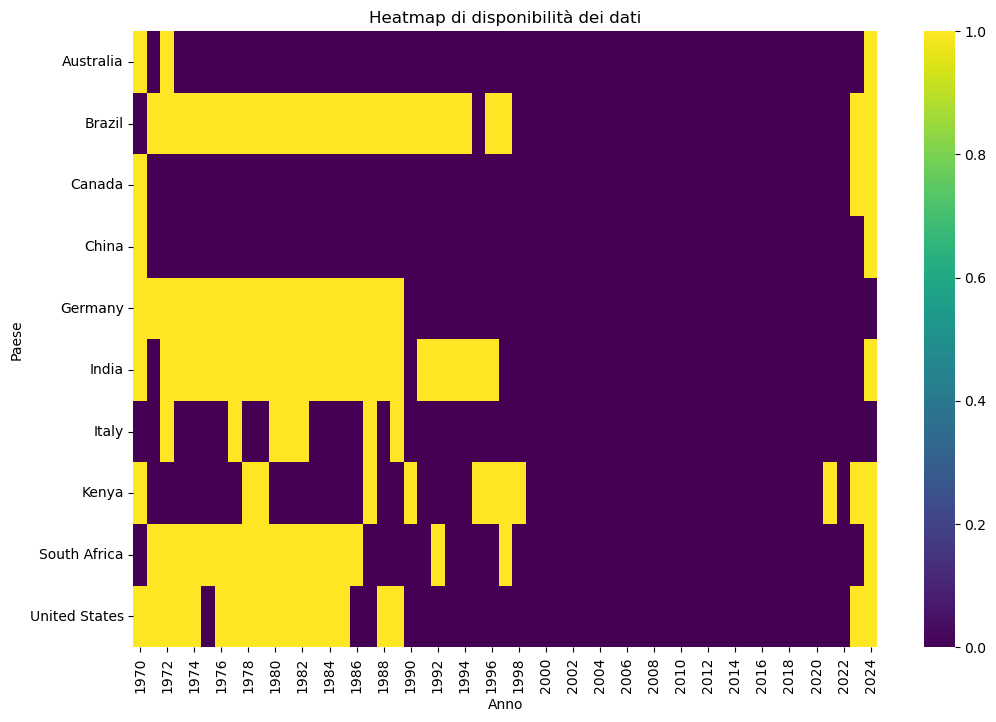

In [22]:
# Creo una heatmap di disponibilità dei dati

plt.figure(figsize=(12, 8))
sns.heatmap(df_ed.pivot_table(index="Country name", 
                              columns="Year", 
                              values="Value")
            .isnull(), 
            cmap="viridis")
plt.title("Heatmap di disponibilità dei dati")
plt.xlabel("Anno")
plt.ylabel("Paese")
plt.show()

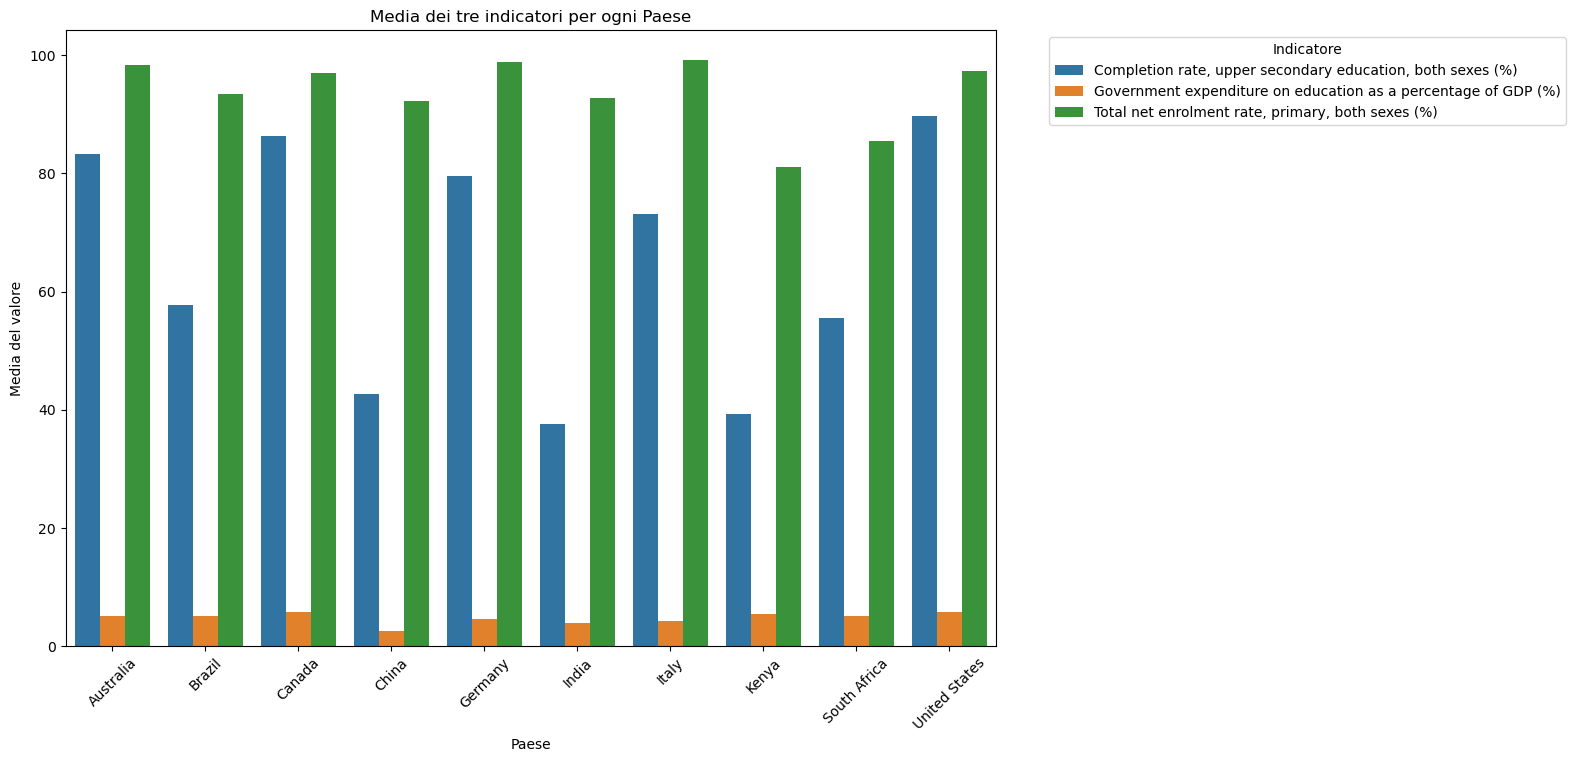

In [23]:
# Creo un bar chart della media dei tre indicatori per ogni Paese, e sposto la legenda per non sovrapporsi con le barre

mean_values = df_ed.groupby(['Country name', 'Indicator name'])['Value'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_values, x='Country name', y='Value', hue='Indicator name', errorbar=None)
plt.title("Media dei tre indicatori per ogni Paese")
plt.xlabel("Paese")
plt.ylabel("Media del valore")
plt.legend(title='Indicatore', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45) 
plt.show() 

In [24]:
# Tengo solo i dati dal 2000 per un'analisi più completa

df_ed = df_ed[df_ed['Year'] >= 2000].reset_index(drop=True)

In [25]:
# Creo una Facet Grid per visualizzare i trend degli indicatori nel tempo per ogni Paese

fig = px.line(
    df_ed,
    x="Year",
    y="Value",
    color="Indicator name",
    facet_col="Country name",
    facet_col_wrap=5,
    markers=True,
    title="Trend degli indicatori educativi (2000-2024)",
)

fig.update_layout(
    title_x=0.5,
    height=1200)
fig.show()

In [26]:
# Creo un box plot per confrontare la distribuzione dei valori degli indicatori tra i Paesi

fig = px.box(
    df_ed,
    x="Indicator name",
    y="Value",
    color="Indicator name",
    points="all",   # mostra i punti, incluso gli outlier
    hover_data=["Country name", "Year"],
    title="Distribuzione dei valori degli indicatori educativi per Paese",
)

fig.update_layout(
    title_x=0.5,
    xaxis_title="Indicator",
    yaxis_title="Value",
    height=2500
)

fig.show()

In [27]:
# Cerco gli outlier  per ogni indicatore con il metodo IQR, e stampo i nomi dei Paesi a cui appartengono

outlier_dict = {}
for indicator in indicators_list:
    df_indicator = df_ed[df_ed['Indicator name'] == indicator]
    Q1 = df_indicator['Value'].quantile(0.25)
    Q3 = df_indicator['Value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_indicator[(df_indicator['Value'] < lower_bound) | (df_indicator['Value'] > upper_bound)]
    outlier_countries = outliers['Country name'].unique().tolist()
    outlier_dict[indicator] = outlier_countries

for indicator, countries in outlier_dict.items():
    print(f"Indicatore: {indicator}")
    print(f"Paesi con Outliers: {countries}")
    print()

Indicatore: Total net enrolment rate, primary, both sexes (%)
Paesi con Outliers: ['India', 'Kenya', 'South Africa']

Indicatore: Completion rate, upper secondary education, both sexes (%)
Paesi con Outliers: ['India']

Indicatore: Government expenditure on education as a percentage of GDP (%)
Paesi con Outliers: ['Kenya']



## Analisi

Dall’analisi temporale degli indicatori emerge innanzitutto che il completion rate dell’istruzione secondaria è l’unico indicatore caratterizzato da un trend di crescita costante in tutti i Paesi considerati.
Questo andamento, spesso in controtendenza rispetto alla stagnazione osservata negli indicatori di expenditure e enrolment dei Paesi più sviluppati, 
suggerisce che i progressi in termini di completamento degli studi non dipendono esclusivamente dall’aumento degli investimenti o dei tassi di iscrizione.

Paesi come Brasile e Cina mostrano le crescite più marcate nel completion rate; t
uttavia non risulta possibile mettere in correlazione tali imponennti crescite con una tendenza simile nell'impegno governativo in termini di spesa nel settore educativo.
nel caso della Cina, inoltre, la crescita avviene nonostante l’assenza quasi totale di dati sull’enrolment, il che indica che i meccanismi di raccolta dati e trasparenza possono essere molto diversi e contribuire alla classificazione del Paese come outlier statistico più che sostanziale.

I Paesi che risultano più frequentemente outlier — Sud Africa, India e Kenya — presentano specificità socio-economiche e strutturali che possono giustificare tali deviazioni. 
Il Sud Africa mostra valori carenti e discontinui nel completion rate, probabilmente legati a forti disuguaglianze interne.
L’India, che risulta outlier negli indicatori di enrolment e completion, registra oscillazioni legate alla complessità territoriale e alla forte eterogeneità regionale.
Il Kenya si distingue come outlier sia nell’enrolment sia nell’expenditure: l’aumento delle spese educative in determinati anni, seguito da un taglio netto, genera un andamento frastagliato che si riflette direttamente nel tasso di iscrizione. Tuttavia, il fatto che il Paese risulti outlier positivo nell’expenditure indica un impegno significativo in certi periodi, impegno che si traduce in un temporaneo incremento dell’enrolment prima della successiva contrazione.

In generale, ciò che rende questi Paesi outlier è la combinazione di instabilità economica, irregolarità nei finanziamenti, differenze nella qualità delle infrastrutture scolastiche e nella capacità di raccolta dati, che produce traiettorie atipiche rispetto al gruppo.

In [ ]:
# Espando la ricerca caricando dataset su mortalità infantile, GDP pro capite e aspettativa di vita

In [28]:
# Carico il primo dataset sul GDP pro capite

df_gdp = pd.read_csv('/Users/valerioquaranta/Documents/Data Manipulation and Visualization/Progetto/Prog_corr/current_GDP_percap.csv', sep=',', skiprows=4) # Salto le prime 4 righe di metadati

In [29]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1510.742951,1567.635839,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


In [30]:
# Pulsco i nomi delle colonne ed elimino quelle non necessarie

df_gdp.columns = df_gdp.columns.str.strip()
df_gdp = df_gdp.drop(columns=['Indicator Code', 'Unnamed: 69'])
df_gdp.head()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,240.955232,...,1479.615260,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1510.742951,1567.635839
2,Afghanistan,AFG,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,162.110768,...,1860.727694,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441
4,Angola,AGO,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690


In [31]:
# Filtro il DataFrame per includere solo i Paesi di interesse, lo converto in formato long, converto la colonna 'Year' in numerico, rimuovo i valori NaN e tengo solo i dati dal 2000 in poi

df_gdp = df_gdp[df_gdp['Country Name'].isin(countries_list)]
df_gdp = df_gdp.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name'],
    var_name='Year',
    value_name='GDP per Capita'
).reset_index(drop=True).drop(columns=['Indicator Name'])
df_gdp['Year'] = pd.to_numeric(df_gdp['Year'], errors='coerce')
df_gdp = df_gdp.dropna(subset=['GDP per Capita'])
df_gdp = df_gdp[df_gdp['Year'] >= 2000].reset_index(drop=True)
df_gdp.head()

,Country Name,Country Code,Year,GDP per Capita
0,Australia,AUS,2000,21870.415967
1,Brazil,BRA,2000,3766.548115
2,Canada,CAN,2000,24271.002056
3,China,CHN,2000,969.199514
4,Germany,DEU,2000,23925.855990


In [32]:
# Ordino il DataFrame per Paese e Anno e approssimo i valori del GDP pro capite

df_gdp = df_gdp.sort_values(by=['Country Name', 'Year']).reset_index(drop=True)
df_gdp['GDP per Capita'] = df_gdp['GDP per Capita'].round(2)
df_gdp.head()

,Country Name,Country Code,Year,GDP per Capita
0,Australia,AUS,2000,21870.42
1,Australia,AUS,2001,19695.73
2,Australia,AUS,2002,20301.84
3,Australia,AUS,2003,23718.13
4,Australia,AUS,2004,30836.73


In [33]:
# Carico il secondo dataset sull'aspettativa di vita, come file csv con virgole come separatori

df_life = pd.read_csv('/Users/valerioquaranta/Documents/Data Manipulation and Visualization/Progetto/Prog_corr/life_expct.csv', sep=',')

In [34]:
df_life.head()

,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,UNIT_MEASURE,UNIT_MEASURE_LABEL,AGG_METHOD,AGG_METHOD_LABEL,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,Annual,ABW,Aruba,WB_WDI_SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",YR,Years,_Z,Not Applicable,...,75.261000,75.405000,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.226000,76.353000
1,A,Annual,AFE,Africa Eastern and Southern,WB_WDI_SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",YR,Years,_Z,Not Applicable,...,61.251436,61.713031,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.487020,65.146291
2,A,Annual,AFG,Afghanistan,WB_WDI_SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",YR,Years,_Z,Not Applicable,...,62.260000,62.270000,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000
3,A,Annual,AFW,Africa Western and Central,WB_WDI_SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",YR,Years,_Z,Not Applicable,...,55.695446,56.038336,56.392452,56.626439,57.036976,57.149847,57.364425,57.362572,57.987813,58.855722
4,A,Annual,AGO,Angola,WB_WDI_SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",YR,Years,_Z,Not Applicable,...,60.396000,61.042000,61.619000,62.122000,62.622000,63.051000,63.116000,62.958000,64.246000,64.617000


In [35]:
# Pulisco i nomi delle colonne ed elimino quelle non necessarie

df_life.columns = df_life.columns.str.strip()
df_life = df_life.drop(columns=['FREQ', 'FREQ_LABEL', 'INDICATOR', 'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'AGG_METHOD', 'AGG_METHOD_LABEL', 'DECIMALS', 'DECIMALS_LABEL', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'DATABASE_ID_LABEL', 'UNIT_MULT_LABEL', 'DATA_SOURCE', 'DATA_SOURCE_LABEL', 'OBS_STATUS', 'OBS_STATUS_LABEL', 'OBS_CONF', 'OBS_CONF_LABEL', 'UNIT_MULT'])
df_life = df_life.rename(columns={
    'REF_AREA': 'Country Code',
    'REF_AREA_LABEL': 'Country Name',
})
df_life.head()

,Country Code,Country Name,INDICATOR_LABEL,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Aruba,"Life expectancy at birth, total (years)",64.049000,64.215000,64.602000,64.944000,65.303000,65.615000,66.126000,...,75.261000,75.405000,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.226000,76.353000
1,AFE,Africa Eastern and Southern,"Life expectancy at birth, total (years)",44.169658,44.468838,44.877890,45.160583,45.535695,45.770723,45.765725,...,61.251436,61.713031,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.487020,65.146291
2,AFG,Afghanistan,"Life expectancy at birth, total (years)",32.799000,33.291000,33.757000,34.201000,34.673000,35.124000,35.583000,...,62.260000,62.270000,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000
3,AFW,Africa Western and Central,"Life expectancy at birth, total (years)",37.779636,38.058956,38.681792,38.936918,39.194580,39.479784,39.719248,...,55.695446,56.038336,56.392452,56.626439,57.036976,57.149847,57.364425,57.362572,57.987813,58.855722
4,AGO,Angola,"Life expectancy at birth, total (years)",37.933000,36.902000,37.168000,37.419000,37.704000,37.968000,38.258000,...,60.396000,61.042000,61.619000,62.122000,62.622000,63.051000,63.116000,62.958000,64.246000,64.617000


In [36]:
# Filtro il DataFrame per includere solo i Paesi di interesse, lo converto in formato long, converto la colonna 'Year' in numerico, rimuovo i valori NaN e tengo solo i dati dal 2000 in poi

df_life = df_life[df_life['Country Name'].isin(countries_list)]
df_life = df_life.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Life Expectancy (Years)'
).reset_index(drop=True)
df_life['Year'] = pd.to_numeric(df_life['Year'], errors='coerce')
df_life = df_life.dropna(subset=['Life Expectancy (Years)'])
df_life = df_life[df_life['Year'] >= 2000].reset_index(drop=True)
df_life.head()

,Country Name,Country Code,Year,Life Expectancy (Years)
0,Australia,AUS,2000.0,79.234146
1,Brazil,BRA,2000.0,69.584
2,Canada,CAN,2000.0,79.166829
3,China,CHN,2000.0,72.288
4,Germany,DEU,2000.0,77.926829


In [37]:
# Ordino il DataFrame per Paese e Anno e approssimo i valori dell'aspettativa di vita

df_life = df_life.sort_values(by=['Country Name', 'Year']).reset_index(drop=True)
df_life['Life Expectancy (Years)'] = df_life['Life Expectancy (Years)'].round(2)
df_life.head()

,Country Name,Country Code,Year,Life Expectancy (Years)
0,Australia,AUS,2000.0,79.234146
1,Australia,AUS,2001.0,79.634146
2,Australia,AUS,2002.0,79.936585
3,Australia,AUS,2003.0,80.239024
4,Australia,AUS,2004.0,80.490244


In [38]:
# Correggo la colonna 'Year' 

df_life['Year'] = df_life['Year'].astype('Int64')
df_life.head()

,Country Name,Country Code,Year,Life Expectancy (Years)
0,Australia,AUS,2000,79.234146
1,Australia,AUS,2001,79.634146
2,Australia,AUS,2002,79.936585
3,Australia,AUS,2003,80.239024
4,Australia,AUS,2004,80.490244


In [39]:
# Carico il terzo dataset sulla mortalità infantile

df_mort = pd.read_csv('/Users/valerioquaranta/Documents/Data Manipulation and Visualization/Progetto/Prog_corr/infant_mortality.csv', sep=',')

In [40]:
df_mort.head()

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,...,DATA_SOURCE_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,COMMENT_OBS,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,AFG,Afghanistan,WB_WDI_SH_DYN_MORT,"Mortality rate, under-5 (per 1,000 live births)",_T,...,World Development Indicators (WDI),COUNT,Count (Integer),P1Y,Annual,NaN,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,DZA,Algeria,WB_WDI_SH_DYN_MORT,"Mortality rate, under-5 (per 1,000 live births)",_T,...,World Development Indicators (WDI),COUNT,Count (Integer),P1Y,Annual,NaN,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,ATG,Antigua and Barbuda,WB_WDI_SH_DYN_MORT,"Mortality rate, under-5 (per 1,000 live births)",_T,...,World Development Indicators (WDI),COUNT,Count (Integer),P1Y,Annual,NaN,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,AUS,Australia,WB_WDI_SH_DYN_MORT,"Mortality rate, under-5 (per 1,000 live births)",_T,...,World Development Indicators (WDI),COUNT,Count (Integer),P1Y,Annual,NaN,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,AUT,Austria,WB_WDI_SH_DYN_MORT,"Mortality rate, under-5 (per 1,000 live births)",_T,...,World Development Indicators (WDI),COUNT,Count (Integer),P1Y,Annual,NaN,A,Normal value,PU,Public


In [41]:
# Vedo i valori dell acolonna INDICATOR_LABEL

df_mort['INDICATOR_LABEL'].unique()

array(['Mortality rate, under-5 (per 1,000 live births)'], dtype=object)

In [42]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13251 entries, 0 to 13250
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STRUCTURE               13251 non-null  object 
 1   STRUCTURE_ID            13251 non-null  object 
 2   ACTION                  13251 non-null  object 
 3   FREQ                    13251 non-null  object 
 4   FREQ_LABEL              13251 non-null  object 
 5   REF_AREA                13251 non-null  object 
 6   REF_AREA_LABEL          13251 non-null  object 
 7   INDICATOR               13251 non-null  object 
 8   INDICATOR_LABEL         13251 non-null  object 
 9   SEX                     13251 non-null  object 
 10  SEX_LABEL               13251 non-null  object 
 11  AGE                     13251 non-null  object 
 12  AGE_LABEL               13251 non-null  object 
 13  URBANISATION            13251 non-null  object 
 14  URBANISATION_LABEL      13251 non-null

In [43]:
# A partire dal dataframe precdente, ne creo uno con le sole colonne necessarie, cioe: REF_AREA, REF_AREA_LABEL e TIME_PERIOD

df_mort = df_mort.rename(columns={
    'REF_AREA': 'Country Code',
    'REF_AREA_LABEL': 'Country Name',
    'INDICATOR_LABEL': 'Indicator Name',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Infant Mortality Rate (per 1000 live births)'
})
df_mort = df_mort[['Country Code', 'Country Name', 'Year', 'Infant Mortality Rate (per 1000 live births)']]
df_mort.head()



,Country Code,Country Name,Year,Infant Mortality Rate (per 1000 live births)
0,AFG,Afghanistan,1960,353.2
1,DZA,Algeria,1960,239.6
2,ATG,Antigua and Barbuda,1960,82.5
3,AUS,Australia,1960,24.9
4,AUT,Austria,1960,42.8


In [44]:
# Filtro il DataFrame per includere solo i Paesi di interesse, converto la colonna 'Year' in numerico, rimuovo i valori NaN e tengo solo i dati dal 2000 in poi

df_mort = df_mort[df_mort['Country Name'].isin(countries_list)]
df_mort['Year'] = pd.to_numeric(df_mort['Year'], errors='coerce')
df_mort = df_mort.dropna(subset=['Infant Mortality Rate (per 1000 live births)'])
df_mort = df_mort[df_mort['Year'] >= 2000].reset_index(drop=True)
df_mort.head()

,Country Code,Country Name,Year,Infant Mortality Rate (per 1000 live births)
0,AUS,Australia,2000,6.2
1,BRA,Brazil,2000,34.5
2,CAN,Canada,2000,6.2
3,CHN,China,2000,36.7
4,DEU,Germany,2000,5.4


In [45]:
# Ordino il DataFrame per Paese e Anno e approssimo i valori della mortalità infantile

df_mort = df_mort.sort_values(by=['Country Name', 'Year']).reset_index(drop=True)
df_mort['Infant Mortality Rate (per 1000 live births)'] = df_mort['Infant Mortality Rate (per 1000 live births)'].round(2)
df_mort.head()

,Country Code,Country Name,Year,Infant Mortality Rate (per 1000 live births)
0,AUS,Australia,2000,6.2
1,AUS,Australia,2001,6.1
2,AUS,Australia,2002,6.0
3,AUS,Australia,2003,5.9
4,AUS,Australia,2004,5.8


In [46]:
# Adesso creo un unico dataframe unendo i quattro dataframes precedenti
# Prima di tutto modifico il df_ed per avere una colonna per ogni indicatore

indicators_map = {
    "Completion rate, upper secondary education, both sexes (%)": "Secondary Completion Rate (%)",
    "Total net enrolment rate, primary, both sexes (%)": "Primary Enrolment Rate(%)",
    "Government expenditure on education as a percentage of GDP (%)": "Education Expenditure (% of GDP)",
}

df_ed = df_ed.pivot_table(
    index=['Country name', 'Country code', 'Year'],
    columns='Indicator name',
    values='Value'
).reset_index()
df_ed = df_ed.rename(columns=indicators_map)
df_ed.head()

Indicator name,Country name,Country code,Year,Secondary Completion Rate (%),Education Expenditure (% of GDP),Primary Enrolment Rate(%)
0,Australia,AUS,2000,80.959999,4.88408,95.293571
1,Australia,AUS,2001,81.489998,NaN,99.524277
2,Australia,AUS,2002,82.019997,NaN,99.668716
3,Australia,AUS,2003,82.599998,NaN,98.615700
4,Australia,AUS,2004,83.099998,NaN,98.880447


In [47]:
# Arrotondo i valori degli indicatori educativi

df_ed['Primary Enrolment Rate(%)'] = df_ed['Primary Enrolment Rate(%)'].round(2)
df_ed['Secondary Completion Rate (%)'] = df_ed['Secondary Completion Rate (%)'].round(2)
df_ed['Education Expenditure (% of GDP)'] = df_ed['Education Expenditure (% of GDP)'].round(2)
df_ed.head()

Indicator name,Country name,Country code,Year,Secondary Completion Rate (%),Education Expenditure (% of GDP),Primary Enrolment Rate(%)
0,Australia,AUS,2000,80.96,4.88,95.29
1,Australia,AUS,2001,81.49,NaN,99.52
2,Australia,AUS,2002,82.02,NaN,99.67
3,Australia,AUS,2003,82.60,NaN,98.62
4,Australia,AUS,2004,83.10,NaN,98.88


In [48]:
# Rinomino le colonne per uniformità

df_ed = df_ed.rename(columns={
    'Country name': 'Country Name',
    'Country code': 'Country Code'
})
df_ed.head()

Indicator name,Country Name,Country Code,Year,Secondary Completion Rate (%),Education Expenditure (% of GDP),Primary Enrolment Rate(%)
0,Australia,AUS,2000,80.96,4.88,95.29
1,Australia,AUS,2001,81.49,NaN,99.52
2,Australia,AUS,2002,82.02,NaN,99.67
3,Australia,AUS,2003,82.60,NaN,98.62
4,Australia,AUS,2004,83.10,NaN,98.88


In [49]:
# Unisco i quattro dataframes

df_final = pd.merge(df_ed, df_gdp, on=['Country Name', 'Country Code', 'Year'], how='inner')
df_final = pd.merge(df_final, df_life, on=['Country Name', 'Country Code', 'Year'], how='inner')
df_final = pd.merge(df_final, df_mort, on=['Country Name', 'Country Code', 'Year'], how='inner')
df_final.head()

,Country Name,Country Code,Year,Secondary Completion Rate (%),Education Expenditure (% of GDP),Primary Enrolment Rate(%),GDP per Capita,Life Expectancy (Years),Infant Mortality Rate (per 1000 live births)
0,Australia,AUS,2000,80.96,4.88,95.29,21870.42,79.234146,6.2
1,Australia,AUS,2001,81.49,NaN,99.52,19695.73,79.634146,6.1
2,Australia,AUS,2002,82.02,NaN,99.67,20301.84,79.936585,6.0
3,Australia,AUS,2003,82.60,NaN,98.62,23718.13,80.239024,5.9
4,Australia,AUS,2004,83.10,NaN,98.88,30836.73,80.490244,5.8


In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country Name                                  235 non-null    object 
 1   Country Code                                  235 non-null    object 
 2   Year                                          235 non-null    int64  
 3   Secondary Completion Rate (%)                 175 non-null    float64
 4   Education Expenditure (% of GDP)              193 non-null    float64
 5   Primary Enrolment Rate(%)                     141 non-null    float64
 6   GDP per Capita                                235 non-null    float64
 7   Life Expectancy (Years)                       235 non-null    object 
 8   Infant Mortality Rate (per 1000 live births)  235 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 16.7+ KB


In [51]:
# cerco quanti valori NaN sono presenti nel dataframe finale

df_final.isna().sum()

Country Name                                     0
Country Code                                     0
Year                                             0
Secondary Completion Rate (%)                   60
Education Expenditure (% of GDP)                42
Primary Enrolment Rate(%)                       94
GDP per Capita                                   0
Life Expectancy (Years)                          0
Infant Mortality Rate (per 1000 live births)     0
dtype: int64

In [52]:
# Converto la colonna 'Life Expectancy (Years)' in numerico

df_final['Life Expectancy (Years)'] = (
    df_final['Life Expectancy (Years)']
    .astype(str)
    .str.replace(",", ".", regex=False)   # se ci fossero virgole
    .str.extract(r"(\d+\.?\d*)")[0]       # estrae solo numeri
    .astype(float)
)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country Name                                  235 non-null    object 
 1   Country Code                                  235 non-null    object 
 2   Year                                          235 non-null    int64  
 3   Secondary Completion Rate (%)                 175 non-null    float64
 4   Education Expenditure (% of GDP)              193 non-null    float64
 5   Primary Enrolment Rate(%)                     141 non-null    float64
 6   GDP per Capita                                235 non-null    float64
 7   Life Expectancy (Years)                       235 non-null    float64
 8   Infant Mortality Rate (per 1000 live births)  235 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 16.7+ KB


In [53]:
# Completo i valori NaN con l'interpolazione lineare per ogni Paese

cols = [
    'Primary Enrolment Rate(%)',
    'Secondary Completion Rate (%)',
    'Education Expenditure (% of GDP)',
    'GDP per Capita',
    'Life Expectancy (Years)',
    'Infant Mortality Rate (per 1000 live births)'
]

df_final = df_final.sort_values(by=['Country Name', 'Year']).reset_index(drop=True)

df_final[cols] = (
    df_final.groupby('Country Name')[cols]
            .transform(lambda group: group.interpolate(method='linear')) # uso transform per mantenere l'indice
)


In [54]:
df_final.isna().sum()

Country Name                                     0
Country Code                                     0
Year                                             0
Secondary Completion Rate (%)                   17
Education Expenditure (% of GDP)                17
Primary Enrolment Rate(%)                       41
GDP per Capita                                   0
Life Expectancy (Years)                          0
Infant Mortality Rate (per 1000 live births)     0
dtype: int64

In [55]:
# Uso ffill e bfill per completare i valori NaN rimanenti

df_final[cols] = df_final.groupby('Country Name')[cols].ffill().bfill()

In [56]:
df_final.isna().sum()

Country Name                                    0
Country Code                                    0
Year                                            0
Secondary Completion Rate (%)                   0
Education Expenditure (% of GDP)                0
Primary Enrolment Rate(%)                       0
GDP per Capita                                  0
Life Expectancy (Years)                         0
Infant Mortality Rate (per 1000 live births)    0
dtype: int64

In [57]:
df_final.head()

,Country Name,Country Code,Year,Secondary Completion Rate (%),Education Expenditure (% of GDP),Primary Enrolment Rate(%),GDP per Capita,Life Expectancy (Years),Infant Mortality Rate (per 1000 live births)
0,Australia,AUS,2000,80.96,4.880,95.29,21870.42,79.234146,6.2
1,Australia,AUS,2001,81.49,4.884,99.52,19695.73,79.634146,6.1
2,Australia,AUS,2002,82.02,4.888,99.67,20301.84,79.936585,6.0
3,Australia,AUS,2003,82.60,4.892,98.62,23718.13,80.239024,5.9
4,Australia,AUS,2004,83.10,4.896,98.88,30836.73,80.490244,5.8


In [58]:
# Ora creo una heatmap per visualizzare le correlazioni tra le variabili del dataframe finale

numeric_cols = [
    "Secondary Completion Rate (%)",
    "Education Expenditure (% of GDP)",
    "Primary Enrolment Rate(%)",
    "GDP per Capita",
    "Life Expectancy (Years)",
    "Infant Mortality Rate (per 1000 live births)"
]

corr_matrix = df_final[numeric_cols].corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    zmin=-1,
    zmax=1,
    title="Correlation Heatmap of Key Indicators",
)

fig.update_layout(
    title_x=0.5,
    width=1200,  
    height=900,
    font=dict(size=16),
    margin=dict(l=60, r=60, t=80, b=60)
)

fig.update_coloraxes(cmid=0)

fig.update_traces(
    texttemplate="%{z:.2f}",
    textfont=dict(size=14, color="white")
)

fig.show()

## Analisi delle correlazioni tra istruzione, sviluppo e indicatori socio-demografici

L’analisi delle correlazioni mette in evidenza una rete di relazioni molto coerenti tra variabili educative, economiche e demografiche. In particolare, il Secondary Completion Rate risulta l’indicatore più fortemente associato sia alle dimensioni economiche che a quelle legate alla salute e allo sviluppo umano. La correlazione molto alta con il GDP per capita (0.87) suggerisce che livelli più elevati di completamento dell’istruzione secondaria si osservano tipicamente nei Paesi con economie più strutturate e stabili, dove l’accesso all’istruzione è sostenuto da investimenti pubblici, infrastrutture e un migliore benessere generale. Coerentemente, la correlazione positiva con la Life Expectancy (0.80) e quella fortemente negativa con l’Infant Mortality Rate (-0.94) indicano che sistemi educativi più efficaci si associano a condizioni di salute migliori e a una più bassa vulnerabilità sanitaria.

Il Primary Enrolment Rate mostra un comportamento simile: presenta una correlazione elevata con la Life Expectancy (0.80) e una correlazione negativa con la mortalità infantile (-0.77). Questo rafforza l’idea che l’accesso all’istruzione primaria rappresenti una componente essenziale dello sviluppo umano e che i Paesi in cui la scolarizzazione primaria è più diffusa siano anche quelli con migliori risultati in termini di salute pubblica e benessere della popolazione. La relazione moderata con il GDP per capita (0.50) conferma inoltre che l’accesso iniziale alla scuola è già un indicatore sensibile del livello di sviluppo economico di un Paese.

Un risultato interessante riguarda invece la Education Expenditure (% of GDP), la cui correlazione con gli altri indicatori è sorprendentemente debole. L’investimento percentuale sul PIL mostra solo una lieve correlazione positiva con il completion rate (0.30) e con il GDP per capita (0.26), mentre risulta quasi del tutto scollegato dagli indicatori sanitari e dall’enrolment primario. Questo suggerisce che la percentuale di spesa relativa al PIL non è di per sé un indicatore affidabile della qualità dei risultati educativi: Paesi con PIL più basso potrebbero dedicare una quota maggiore alle spese educative, senza però garantire risultati comparabili, mentre Paesi ad alto PIL potrebbero investire una quota più contenuta ma in valori assoluti molto più elevati. Il dato sembra quindi confermare la necessità di interpretare la spesa in istruzione non solo come percentuale del PIL, ma anche nel contesto di fattori come efficienza gestionale, capacità amministrativa e distribuzione della spesa.

Le correlazioni tra indicatori economici e sanitari — in particolare quella molto alta tra Life Expectancy e Infant Mortality Rate (-0.94) — mostrano la coerenza interna del dataset e confermano l’affidabilità delle relazioni individuate: Paesi più ricchi, più istruiti e con migliori performance educative tendono a presentare anche migliori condizioni di salute e livelli inferiori di mortalità infantile.

Nel complesso, questa matrice di correlazioni suggerisce un quadro chiaro: istruzione, salute e sviluppo economico sono dimensioni profondamente interconnesse, e i Paesi che investono in un accesso efficace e continuativo all’istruzione — soprattutto secondaria — raccolgono benefici evidenti in termini di prosperità economica e benessere sociale. Le variabili educative analizzate non agiscono isolatamente, ma si integrano in un sistema più ampio di fattori che definiscono il livello di sviluppo di un Paese e le opportunità delle future generazioni.

In [59]:
# Creo un bubble chart animato per visualizzare la relazione tra GDP pro capite, aspettativa di vita e tasso di completamento dell'istruzione secondaria nel tempo
# Per ottenere questa vsualizzazione, modifico il df_final per tenere solo i dati fino al 2020

df_viz = df_final[df_final['Year'] <= 2020].reset_index(drop=True)

fig = px.scatter(
    df_viz,
    x="GDP per Capita",
    y="Life Expectancy (Years)",
    size="Secondary Completion Rate (%)",
    color="Country Name",
    hover_name="Country Name",
    animation_frame="Year",
    log_x=True,
    size_max=60,
    range_x=[300, 100000],
    range_y=[50, 90],
    title="GDP per Capita vs Life Expectancy with Secondary Completion Rate (2000-2020)"
)

fig.update_layout(
    title_x=0.5,
    height=700)
fig.show()



In [60]:
# Creo un altr0 bubble chart animato per vedere la relazione tra tasso di completmento secondario, aspettativa di vita e gdp pro capite nel tempo

fig = px.scatter(
    df_viz,
    x="Secondary Completion Rate (%)",
    y="Life Expectancy (Years)",
    size="GDP per Capita",
    color="Country Name",
    hover_name="Country Name",
    animation_frame="Year",
    size_max=60,
    range_x=[20, 100],
    range_y=[50, 90],
    title="Secondary Completion Rate vs Life Expectancy with GDP per Capita (2000-2020)"
)
fig.update_layout(
    title_x=0.5,
    height=700)
fig.show()

In [61]:
# Vedo le statistiche descrittive 

df_final.describe()

,Year,Secondary Completion Rate (%),Education Expenditure (% of GDP),Primary Enrolment Rate(%),GDP per Capita,Life Expectancy (Years),Infant Mortality Rate (per 1000 live births)
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,2011.263830,65.623213,4.759319,95.905851,24065.732723,74.048604,22.964681
std,6.814904,21.927400,0.927091,5.740336,21504.600314,8.275773,24.647418
min,2000.000000,22.430000,2.700000,64.960000,402.940000,53.914000,2.800000
25%,2005.000000,48.790000,4.110000,94.180000,3197.070000,67.849500,5.100000
50%,2011.000000,73.580000,4.770000,98.500000,19695.730000,77.434146,8.000000
75%,2017.000000,85.020000,5.280000,99.545000,43249.440000,80.781707,36.100000
max,2023.000000,95.040000,7.340000,99.990000,77860.910000,83.700000,96.300000


In [62]:
# Identifico gli outlier per ogni indicatore usando il metodo IQR sul dataframe finale, e stampo i nomi dei Paesi a cui appartengono

outlier_dict_final = {}
for col in cols:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_final[(df_final[col] < lower_bound) | (df_final[col] > upper_bound)]
    outlier_countries = outliers['Country Name'].unique().tolist()
    outlier_dict_final[col] = outlier_countries

for indicator, countries in outlier_dict_final.items():
    print(f"Indicatore: {indicator}")
    print(f"Paesi con Outliers: {countries}")
    print()

Indicatore: Primary Enrolment Rate(%)
Paesi con Outliers: ['India', 'Kenya', 'South Africa']

Indicatore: Secondary Completion Rate (%)
Paesi con Outliers: []

Indicatore: Education Expenditure (% of GDP)
Paesi con Outliers: ['Kenya']

Indicatore: GDP per Capita
Paesi con Outliers: []

Indicatore: Life Expectancy (Years)
Paesi con Outliers: []

Indicatore: Infant Mortality Rate (per 1000 live births)
Paesi con Outliers: ['India', 'Kenya']



# Conclusioni

### L’analisi congiunta dei sei indicatori educativi, economici e sanitari ha mostrato come i sistemi educativi si inseriscano in un ecosistema più ampio, dove sviluppo economico e condizioni di salute evolvono in modo fortemente correlato con i risultati scolastici. Le statistiche descrittive evidenziano valori medi coerenti con i trend globali, ma anche differenze strutturali importanti tra Paesi, che emergono con chiarezza dagli outlier e dai casi studio più estremi.

1. Investire sull’istruzione secondaria genera benefici trasversali (alta robustezza analitica)

La correlazione elevata tra Completion Rate secondario e variabili macro-economiche e sanitarie — in particolare GDP pro capite (0.87), aspettativa di vita (0.80) e mortalità infantile (–0.94) — indica che il rafforzamento dell’istruzione secondaria dovrebbe rappresentare una priorità strategica nei Paesi a medio reddito.
Raccomandazione: promuovere politiche di completamento della scuola secondaria, poiché gli effetti positivi superano l’ambito educativo e accelerano il miglioramento degli indicatori demografici e sanitari.

2. La qualità della spesa pubblica in educazione pesa più della quantità

La correlazione tra spesa pubblica in educazione (% GDP) e gli outcome è debole o nulla. Anzi, Paesi come Kenya e Sud Africa spendono sopra la media mondiale (4.76% del PIL), ma non ottengono miglioramenti proporzionati nei principali indicatori educativi.
Al contrario, la Cina, pur posizionandosi nella fascia bassa della spesa, mostra la crescita più significativa in completamento secondario, aspettativa di vita e riduzione della mortalità infantile.
Raccomandazione: concentrare gli investimenti su interventi ad alto ritorno (qualità dell’insegnamento, infrastrutture essenziali), piuttosto che aumentare la quota del PIL senza una revisione dell’efficienza allocativa.

3. Ampliare l’istruzione primaria genera effetti cumulativi su tutti gli indicatori successivi

Il Primary Enrolment (media 95.9%, con range ampio: 64.9–99.9%) mostra correlazioni molto elevate con aspettativa di vita (0.80) e moderate con il completamento secondario (0.56).
Questo indica che le basi costruite nei primi cicli scolastici determinano la traiettoria formativa e di salute della popolazione nei decenni successivi.
Raccomandazione: rafforzare le politiche di accesso alla scuola primaria nelle aree con iscrizione discontinua o fragile (India, Kenya, Sud Africa), incluse campagne di sostegno alle famiglie, programmi nutrizionali e riduzione dei costi indiretti dell’educazione.

5. Aumentare l’aspettativa di vita e ridurre la mortalità infantile passa anche dall’educazione

La correlazione più forte di tutto il dataset (–0.94 tra mortalità infantile e aspettativa di vita) mostra come i due indicatori sanitari siano strettamente intrecciati.
Tuttavia, il dato chiave è che entrambi migliorano sostanzialmente nei Paesi che incrementano la qualità e la continuità dell’istruzione, specialmente primaria e secondaria.
Raccomandazione: adottare strategie che intregano salute ed educazione, in particolare nei Paesi a basso reddito.

6. Considerare la dimensione temporale: il miglioramento medio richiede almeno un decennio

I dati, distribuiti tra 2000 e 2023, mostrano che gli indicatori migliorano gradualmente:

Progressione media annua nel Completion Rate ~ +0.7%

Incrementi lenti ma stabili dell’aspettativa di vita

Calo della mortalità infantile più marcato nei Paesi a crescita economica sostenuta
Raccomandazione: le policy devono essere mantenute nel tempo; i ritorni sugli investimenti educativi emergono tipicamente dopo cicli strutturali di 8–12 anni.